# Регрессия и классификация

## Линейная регрессия

Линейная регрессия и ее расширения — методы предсказания, когда вектор целей является количественным
значением (например, цена дома, возраст).
Подобные модели популярны в силу быстрой обучаемости и возврата очень удобных для интерпретации результатов.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Простейшая форма линейной регрессионной модели- подбор для данных разделяющей прямой линии(прямолинейная аппроксимация), но такие модели можно распространить на моделирование и более сложного поведения данных.
Прямолинейная аппроксимация представляет собой модель вида y = ax + b, в которой a известна как угловой коэффициент, а b — как точка пересечения с осью координат Y.

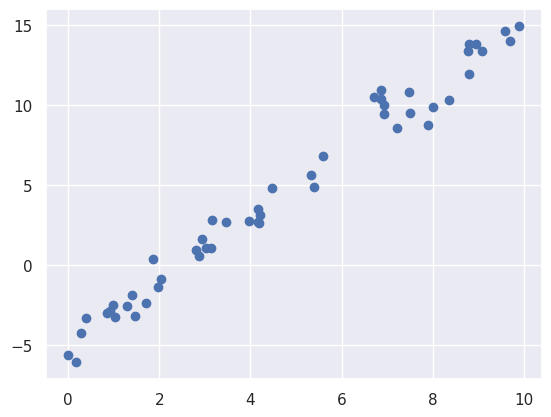

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x, y)

Воспользуемся оценивателем LinearRegression из библиотеки Scikit-Learn для обучения на этих данных и поиска оптимальной прямой

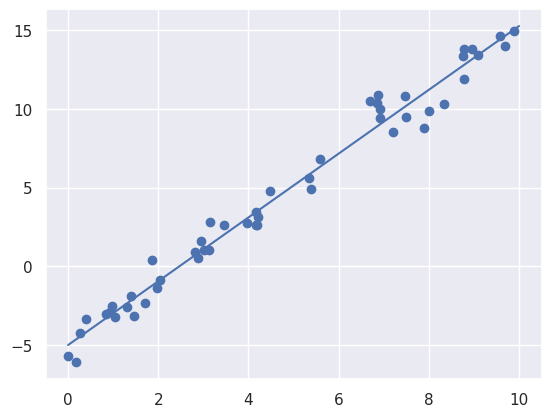

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

Обучаемые параметры модели (в библиотеке Scikit-Learn всегда содержат в конце знак подчеркивания) включают угловой коэффициент и точку пересечения с осью координат. В данном случае соответствующие параметры — coef_и intercept_

In [ ]:
print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения  с осью координат:", model.intercept_)

Угловой коэффициент:  2.0272088103606953
Точка пересечения  с осью координат: -4.998577085553204


Возможности оценивателя LinearRegression намного шире этого: помимо аппроксимации прямыми линиями, он может также работать с многомерными
линейными моделями вида:
y = a0 + a1x1+a2x2+… с несколькими величинами x.
Геометрически это подобно подбору плоскости для точек в трех измерениях или гиперплоскости для точек в пространстве с еще большим числом измерений.

Угловой коэффициент:  2.0272088103606953
Точка пересечения  с осью координат: -4.998577085553204


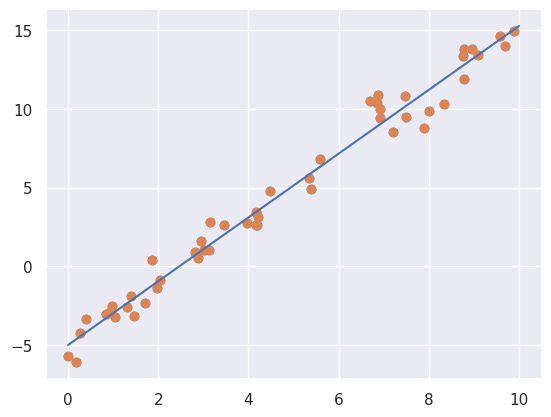

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x, y)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения  с осью координат:", model.intercept_)

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')
   Id   age  years_of_experience  lesson_price  qualification physics  \
0   0  40.0                  0.0        1400.0            1.0     Yes   
1   1  48.0                  4.0        2850.0            3.0     Yes   
2   2  39.0                  0.0        1200.0            1.0      No   
3   3  46.0                  5.0        1400.0            1.0      No   
4   4  43.0                  1.0        1500.0            1.0      No   

  chemistry biology english geography history  mean_exam_points  
0        No      No      No       Yes      No              63.0  
1        No      No      No        No      No              86.0  
2        No      No      No        No      No              53.0  
3        No      No      No        No      No              56.0  
4        No      No      No 

<ipython-input-11-d5d098ff3296>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['lesson_price'].dropna(), bins=30)


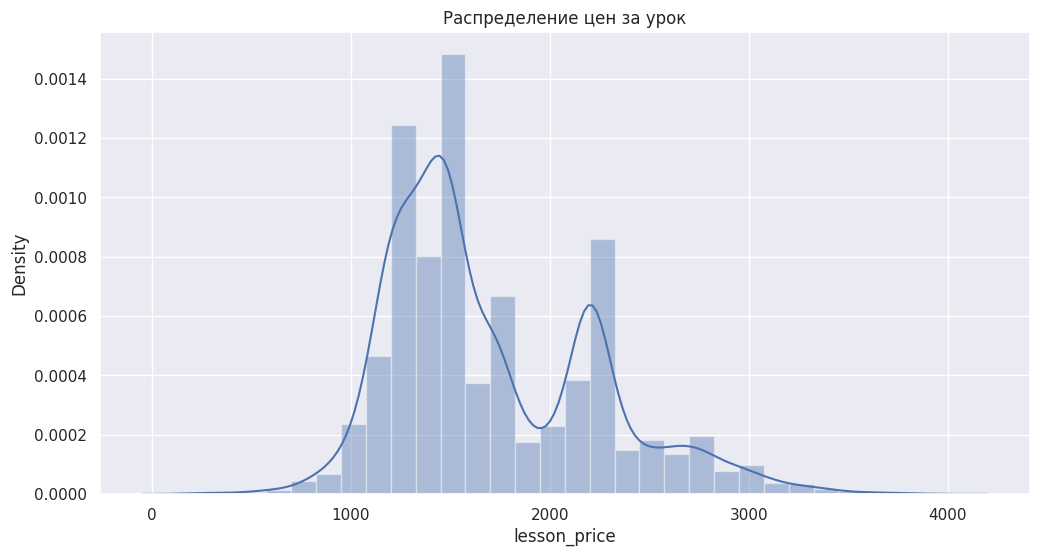

Количество пропусков в lesson_price после обработки: 0
Максимальное значение lesson_price: 1000.0


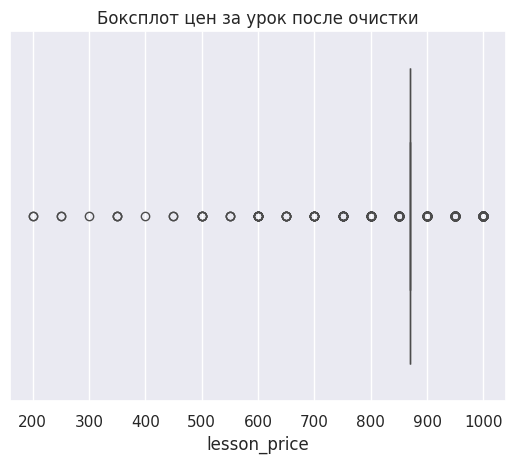

                       Id   age  years_of_experience  lesson_price  \
Id                   1.00 -0.00                 0.01          0.01   
age                 -0.00  1.00                 0.06          0.00   
years_of_experience  0.01  0.06                 1.00         -0.06   
lesson_price         0.01  0.00                -0.06          1.00   
qualification       -0.01 -0.00                 0.19         -0.00   
physics             -0.01  0.00                 0.01         -0.01   
chemistry            0.00  0.00                 0.00          0.02   
biology             -0.00 -0.01                -0.00          0.00   
english              0.02 -0.01                -0.01          0.00   
geography           -0.01  0.01                -0.01         -0.00   
history             -0.00  0.01                 0.02          0.02   
mean_exam_points     0.00 -0.01                 0.21          0.00   

                     qualification  physics  chemistry  biology  english  \
Id           

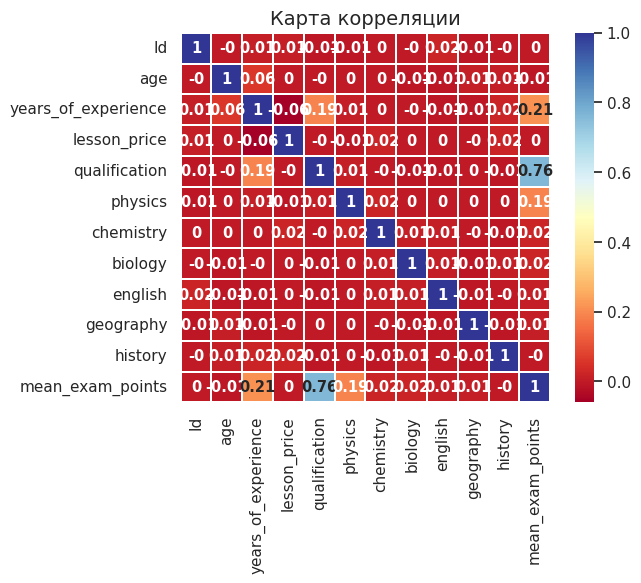

   Id   age  years_of_experience  lesson_price  qualification  physics  \
0   0  40.0                  0.0      0.836682            1.0        1   
1   1  48.0                  4.0      0.836682            3.0        1   
2   2  39.0                  0.0      0.836682            1.0        0   
3   3  46.0                  5.0      0.836682            1.0        0   
4   4  43.0                  1.0      0.836682            1.0        0   

   chemistry  biology  english  geography  history  mean_exam_points  
0          0        0        0          1        0              63.0  
1          0        0        0          0        0              86.0  
2          0        0        0          0        0              53.0  
3          0        0        0          0        0              56.0  
4          0        0        0          0        0              59.0  
Форма данных:
Общие данные: (10000, 10)
Обучающие данные: (8000, 10)
Тестовые данные: (2000, 10)


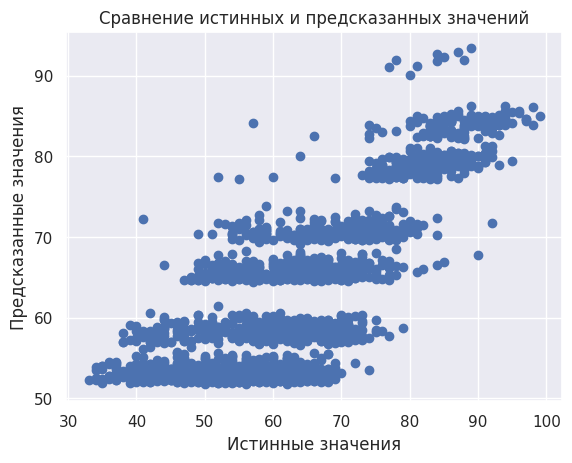

Угловой коэффициент:  [-0.02028648  0.44827455  3.37868778 12.62085123  4.98396659  0.54999749
  1.12137284  0.69476384  1.09109123  0.56020196]
Точка пересечения с осью координат: 37.6455066086089


In [11]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Включаем стиль seaborn
sns.set()

# Загружаем данные из CSV файла
data = pd.read_csv('exam_регр.csv', sep=';')

# Выводим имена столбцов
print(data.columns)

# Удаление пробелов из имен столбцов (если есть)
data.columns = data.columns.str.strip()

# Обработка пропусков данных
data.fillna(0, inplace=True)
print(data.head())

missing_counts = data.isnull().sum()
print("Количество пропусков в каждом столбце:\n", missing_counts)

# Обнаружение выбросов
plt.figure(figsize=(12, 6))

# Визуализация распределения 'lesson_price'
sns.distplot(data['lesson_price'].dropna(), bins=30)
plt.title('Распределение цен за урок')
plt.show()

# Определение выбросов в 'lesson_price'
data.loc[(data.lesson_price < 0) | (data.lesson_price > 1000), 'lesson_price'] = np.nan

# Обработка NaN значений, замена их на среднее значение по столбцу
data['lesson_price'] = data['lesson_price'].fillna(data['lesson_price'].mean())
print("Количество пропусков в lesson_price после обработки:", data.isnull().sum()['lesson_price'])
print("Максимальное значение lesson_price:", data.lesson_price.max())

# Визуализация очищенного распределения
sns.boxplot(x=data.lesson_price.dropna())
plt.title('Боксплот цен за урок после очистки')
plt.show()

# Кодирование категориальных данных
for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

# Проверка зависимостей в данных
var_corr = round(data.corr(numeric_only=True), 2)
print(var_corr)

mask = np.zeros_like(var_corr)
sns.heatmap(var_corr, mask=mask, square=True, annot=True, annot_kws={'size': 10.5, 'weight': 'bold'}, cmap=plt.get_cmap("RdYlBu"), linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()

# Нормализация данных
# Стандартная нормализация
scale_features_std = StandardScaler()
data[['lesson_price']] = scale_features_std.fit_transform(data[['lesson_price']])

# Нормализация Min-Max
minmax_scaler = MinMaxScaler()
data[['lesson_price']] = minmax_scaler.fit_transform(data[['lesson_price']])
print(data.head())

# Разделение данных для обучения и тестирования
features = data.drop(['Id', 'mean_exam_points'], axis=1)  # Убираем 'Id' и целевую переменную
labels = data['mean_exam_points']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)

print("Форма данных:")
print("Общие данные:", features.shape)
print("Обучающие данные:", features_train.shape)
print("Тестовые данные:", features_test.shape)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression(fit_intercept=True)
model.fit(features_train, labels_train)

# Предсказываем значения на основе модели
predictions = model.predict(features_test)

# Строим график с линейной регрессией
plt.scatter(labels_test, predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.show()

# Выводим угловой коэффициент и точку пересечения
print("Угловой коэффициент: ", model.coef_)
print("Точка пересечения с осью координат:", model.intercept_)


In [36]:
data.describe()

,Id,age,years_of_experience,lesson_price,qualification,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,100.000000


In [43]:
import pandas as pd

# Загружаем ваш DataFrame
df = pd.read_csv('exam_регр.csv')

# Отбор только числовых столбцов
numeric_df = df.select_dtypes(include=['number'])

# Получаем 75% от максимума для каждого числового столбца
thresholds = numeric_df.quantile(0.75)

# Создаем маску, чтобы оставить только строки, где все значения не превышают 75%
mask = (numeric_df <= thresholds).all(axis=1)

# Применяем маску к исходному DataFrame, чтобы удалить ненужные строки
df_cleaned = df[mask]

# Выводим результат
print("Очищенный DataFrame:")
print(df_cleaned)

# Если хотите сохранить очищенные данные в новый CSV-файл
df_cleaned.to_csv('cleaned_data.csv', index=False)


Очищенный DataFrame:
     Id;age;years_of_experience;lesson_price;qualification;physics;chemistry;biology;english;geography;history;mean_exam_points
0        0;40.0;0.0;1400.0;1.0;Yes;No;No;No;Yes;No;63.0                                                                        
1         1;48.0;4.0;2850.0;3.0;Yes;No;No;No;No;No;86.0                                                                        
2          2;39.0;0.0;1200.0;1.0;No;No;No;No;No;No;53.0                                                                        
3          3;46.0;5.0;1400.0;1.0;No;No;No;No;No;No;56.0                                                                        
4          4;43.0;1.0;1500.0;1.0;No;No;No;No;No;No;59.0                                                                        
...                                                 ...                                                                        
9995  9995;44.0;0.0;1700.0;2.0;Yes;Yes;No;No;No;No;78.0                            

In [50]:
data.describe()

,Id,age,years_of_experience,lesson_price,qualification,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,100.000000


In [3]:
import pandas as pd
import numpy as np

# 1. Загрузка данных
data = pd.read_csv('exam_регр.csv', sep=';')

# 2. Обработка пропущенных значений
# Заполнение пропусков средними значениями для числовых столбцов
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Заполнение пропусков модой для категориальных данных
categorical_cols = data.select_dtypes(include=['object']).columns
for column in categorical_cols:
    data[column].fillna(data[column].mode()[0], inplace=True)

# 3. Удаление дубликатов
data.drop_duplicates(inplace=True)

# 4. Предварительная обработка текстовых данных
# Приведение строк к нижнему регистру
for column in categorical_cols:
    data[column] = data[column].str.lower().str.strip()

# Удаление лишних пробелов
data.replace(r'\s+', ' ', regex=True, inplace=True)

# Удаление строк с пустыми значениями после обработки
data.dropna(inplace=True)

# 5. Вывод очищенного DataFrame
print("Очищенный DataFrame:\n", data)


<ipython-input-3-d22629b72fb4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


Очищенный DataFrame:
         Id   age  years_of_experience  lesson_price  qualification physics  \
0        0  40.0                  0.0        1400.0            1.0     yes   
1        1  48.0                  4.0        2850.0            3.0     yes   
2        2  39.0                  0.0        1200.0            1.0      no   
3        3  46.0                  5.0        1400.0            1.0      no   
4        4  43.0                  1.0        1500.0            1.0      no   
...    ...   ...                  ...           ...            ...     ...   
9995  9995  44.0                  0.0        1700.0            2.0     yes   
9996  9996  51.0                  0.0        1700.0            2.0      no   
9997  9997  34.0                  1.0        1250.0            1.0     yes   
9998  9998  33.0                  3.0        1100.0            1.0      no   
9999  9999  35.0                  0.0        1450.0            1.0      no   

     chemistry biology english geography 

In [25]:
import pandas as pd

# Загрузка данных из CSV с использованием ; в качестве разделителя
df = pd.read_csv('exam_регр.csv', delimiter=';')

# Просмотр первых нескольких строк DataFrame
print(df.head())


   Id   age  years_of_experience  lesson_price  qualification physics  \
0   0  40.0                  0.0        1400.0            1.0     Yes   
1   1  48.0                  4.0        2850.0            3.0     Yes   
2   2  39.0                  0.0        1200.0            1.0      No   
3   3  46.0                  5.0        1400.0            1.0      No   
4   4  43.0                  1.0        1500.0            1.0      No   

  chemistry biology english geography history  mean_exam_points  
0        No      No      No       Yes      No              63.0  
1        No      No      No        No      No              86.0  
2        No      No      No        No      No              53.0  
3        No      No      No        No      No              56.0  
4        No      No      No        No      No              59.0  


In [30]:
import pandas as pd
import numpy as np

# Загрузка данных из CSV-файла с разделителем ';'
df = pd.read_csv('exam_регр.csv', delimiter=';')

# 1. Обнаружение и обработка пропущенных значений
print("Исходные данные:")
print(df.isnull().sum())  # Вывод количества пропущенных значений в каждом столбце

# Удаление строк с хотя бы одним пропущенным значением (опционально)
df_cleaned = df.dropna()

# Заполнение пропусков средним значением для числовых столбцов
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Для категориальных данных заполняем наиболее частым значением
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

print("\nПосле заполнения пропусков:")
print(df)

# 2. Удаление дубликатов
df_unique = df.drop_duplicates()
print("\nПосле удаления дубликатов:")
print(df_unique)

# 3. Удаление лишних пробелов и приведение к нижнему регистру для текстовых данных
for column in categorical_cols:
    df_unique[column] = df_unique[column].str.strip().str.lower()

print("\nПосле удаления пробелов и приведения к нижнему регистру:")
print(df_unique)

# 4. Удаление строк с пустыми данными (если это необходимо)
df_cleaned_final = df_unique.dropna()
print("\nПосле удаления строк с пустыми данными:")
print(df_cleaned_final)

# 5. Сохранение очищенного датафрейма в новый CSV-файл
df_cleaned_final.to_csv('cleaned_exam_регр.csv', index=False, sep=';')
print("\nОчищенные данные сохранены в 'cleaned_exam_регр.csv'.")


Исходные данные:
Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

После заполнения пропусков:
        Id   age  years_of_experience  lesson_price  qualification physics  \
0        0  40.0                  0.0        1400.0            1.0     Yes   
1        1  48.0                  4.0        2850.0            3.0     Yes   
2        2  39.0                  0.0        1200.0            1.0      No   
3        3  46.0                  5.0        1400.0            1.0      No   
4        4  43.0                  1.0        1500.0            1.0      No   
...    ...   ...                  ...           ...            ...     ...   
9995  9995  44.0                  0.0        1700.0            2.0     Yes   
9996  9996  51.0 

<ipython-input-30-f0a37f034f19>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)



Очищенные данные сохранены в 'cleaned_exam_регр.csv'.


<Axes: >

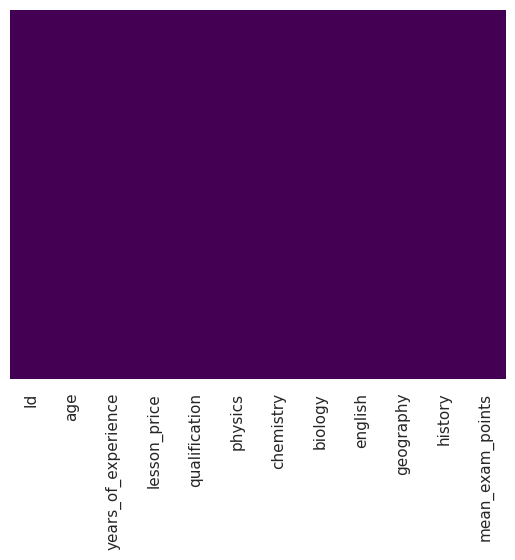

In [31]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')


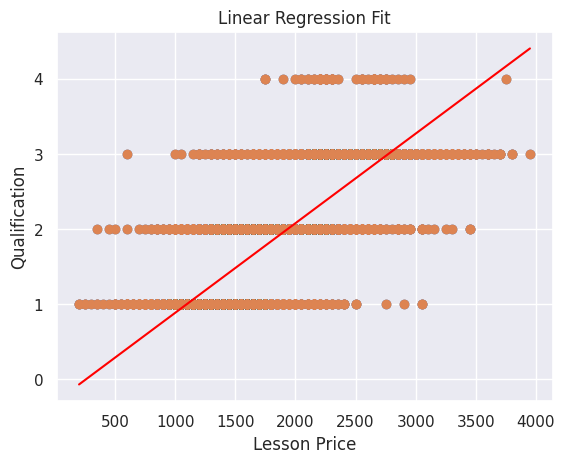

Угловой коэффициент:  0.0011925577253769633
Точка пересечения с осью координат: -0.30678079397662517


In [42]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Включаем стиль seaborn
sns.set()

# Загружаем данные из CSV файла с разделителем ;
data = pd.read_csv('cleaned_exam_регр.csv', sep=';')

# Выводим имена столбцов
print(data.columns)

# Удаление пробелов из имен столбцов (если есть)
data.columns = data.columns.str.strip()

# Извлекаем переменные
x = data['lesson_price'].values  # Изменено на 'lesson_price'
y = data['qualification'].values   # Изменено на 'qualification'

# Создаем график рассеяния
plt.scatter(x, y)
plt.xlabel('Lesson Price')  # Изменено на 'Lesson Price'
plt.ylabel('Qualification')  # Изменено на 'Qualification'
plt.title('Scatter Plot of Qualification vs Lesson Price')

# Создаем и обучаем модель линейной регрессии
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

# Предсказываем значения на основе модели
xfit = np.linspace(x.min(), x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Строим график с линейной регрессией
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlabel('Lesson Price')  # Изменено на 'Lesson Price'
plt.ylabel('Qualification')  # Изменено на 'Qualification'
plt.title('Linear Regression Fit')
plt.show()

# Выводим угловой коэффициент и точку пересечения
print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения с осью координат:", model.intercept_)


Объяснение кода:
Импорт библиотек: Мы импортируем необходимые библиотеки для работы с данными и визуализации.
Загрузка данных: Используем pandas для загрузки данных из CSV файла.
Извлечение переменных: Мы берем years_of_experience как независимую переменную (X) и mean_exam_points как зависимую переменную (Y).
Визуализация: Сначала строим график рассеяния, чтобы визуализировать данные.
Обучение модели: Создаем и обучаем модель линейной регрессии с помощью sklearn.
Предсказание и визуализация: Предсказываем значения и добавляем линию регрессии на график.
Вывод коэффициентов: Печатаем угловой коэффициент и точку пересечения.

## Полиномиальные базисные функции

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

После такого преобразования можно воспользоваться линейной моделью для подбора намного более сложных зависимостей между величинами x и y.

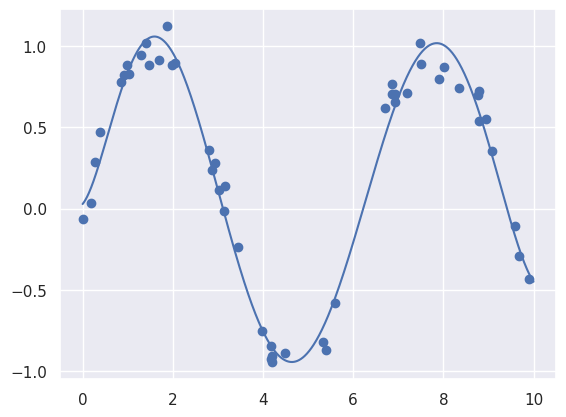

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) #зашумленная синусоида
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

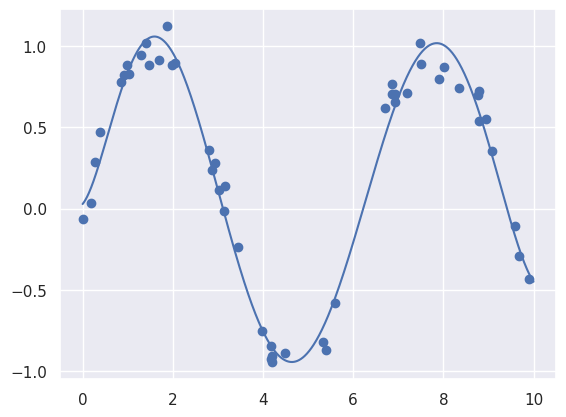

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) #зашумленная синусоида
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

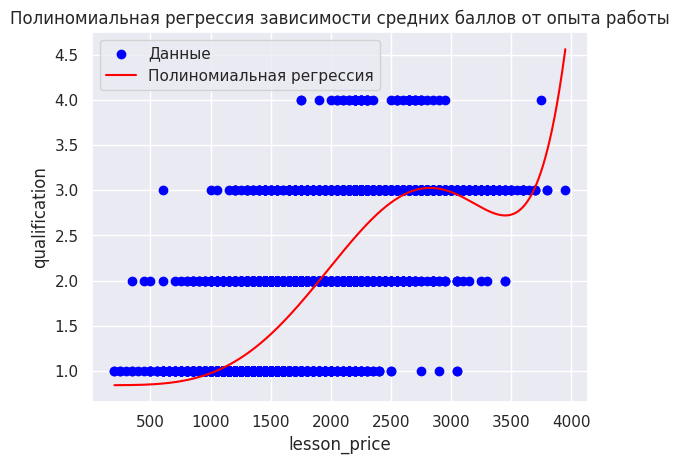

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Загрузка данных из CSV файла с разделителем ;
data = pd.read_csv('exam_регр.csv', sep=';')

# Извлечение переменных
x = data['lesson_price'].values
y = data['qualification'].values

# Создание модели полиномиальной регрессии
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

# Обучение модели
poly_model.fit(x[:, np.newaxis], y)

# Создание точек для предсказания
xfit = np.linspace(x.min(), x.max(), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Построение графика
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(xfit, yfit, label='Полиномиальная регрессия', color='red')
plt.xlabel('lesson_price')
plt.ylabel('qualification')
plt.title('Полиномиальная регрессия зависимости средних баллов от опыта работы')
plt.legend()
plt.show()


## Регуляризация

Применение базисных функций в линейной модели делает ее намного гибче, но также и быстро приводит к переобучению.
Например, если выбрать слишком много базисных функций, мы в итоге получим не слишком хорошие результаты. Модель будет переобученной

### Гребневая регрессия (L2 -регуляризация)

Самый популярный вид регуляризации — гребневая регрессия (ridge regression), или L2-регуляризация, также иногда называемая регуляризацией Тихонова (Tikhonov regularization).
Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели.
Этот тип модели со штрафом встроен в библиотеку Scikit-Learn в виде оценивателя Ridge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.35848e-53): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


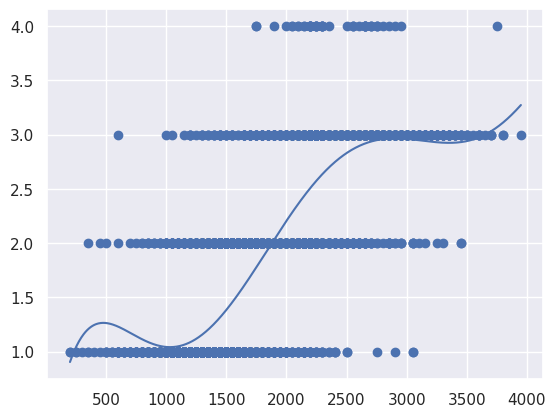

In [6]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1)) # Гребневая регрессия
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))


Параметр $\alpha$ служит для управления сложностью получаемой в итоге модели.
В предельном случае $\alpha$ → 0 мы получаем результат, соответствующий стандартной линейной регрессии;
В предельном случае $\alpha$ → $\infty$ будет происходить подавление любого отклика модели.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.35848e-53): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


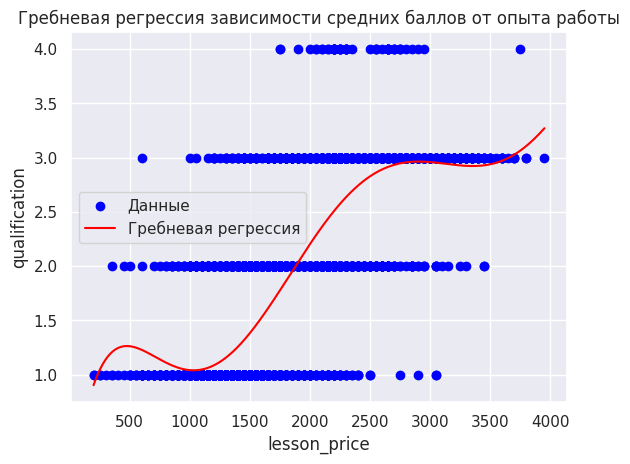

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Загрузка данных из CSV файла с разделителем ;
data = pd.read_csv('exam_регр.csv', sep=';')

# Извлечение переменных
x = data['lesson_price'].values
y = data['qualification'].values

# Создание модели гребневой регрессии
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))

# Обучение модели
model.fit(x[:, np.newaxis], y)

# Создание точек для предсказания
xfit = np.linspace(x.min(), x.max(), 1000)

# Построение графика
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), label='Гребневая регрессия', color='red')
plt.xlabel('lesson_price')
plt.ylabel('qualification')
plt.title('Гребневая регрессия зависимости средних баллов от опыта работы')
plt.legend()
plt.show()


### Лассо-регуляризация (L1 )

Этот тип регуляризации  включает штрафование на сумму абсолютных значений (L1-норма)коэффициентов регрессии.
Хотя концептуально эта регрессия очень близка к гребневой, результаты их могут очень сильно различаться.
Например, по геометрическим причинам лассо-регрессия любит разреженные модели, то есть она по возможности делает коэффициенты
модели равными нулю.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 6.276e-01
  model = cd_fast.enet_coordinate_descent(


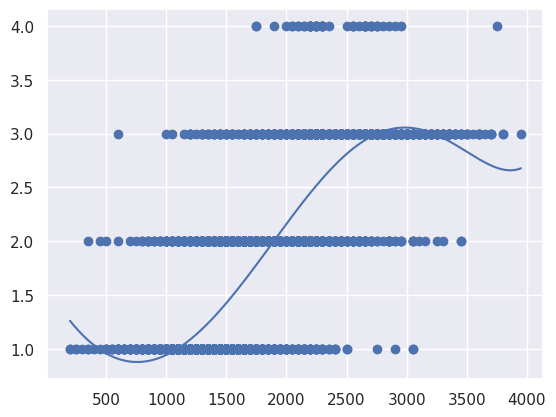

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001)) # Лассо-регуляризация
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

При использовании штрафа лассо-регрессии большинство коэффициентов в точности равны нулю, а функциональное поведение моделируется небольшим подмножеством из имеющихся базисных функций.

## Пример решения задачи регрессии для датасета

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
wine_data = load_wine()
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

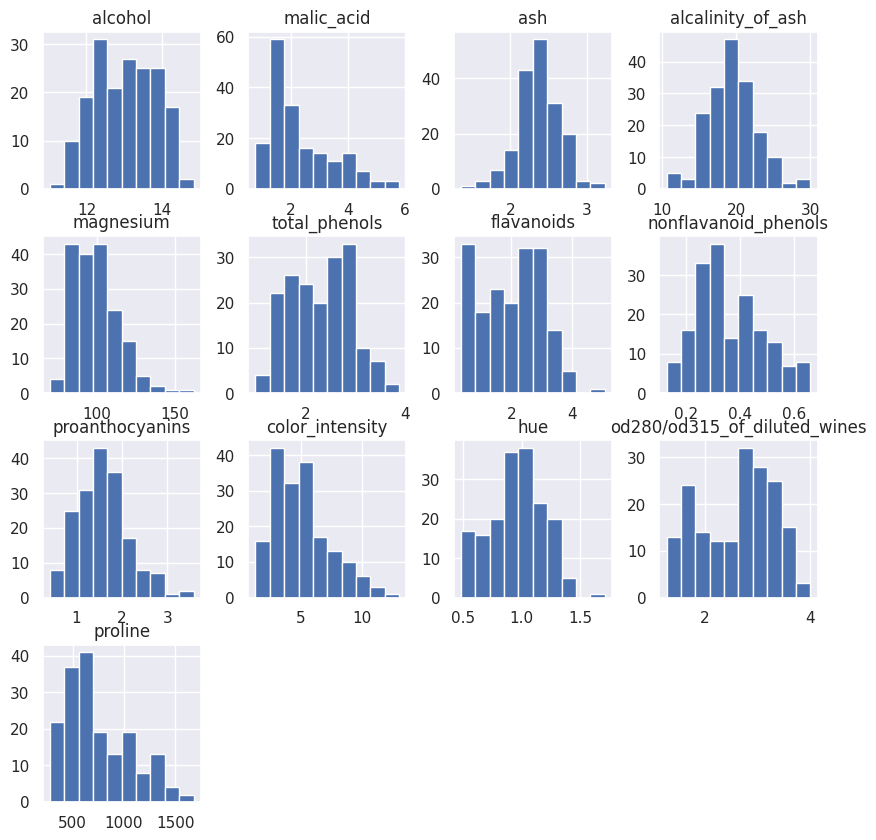

In [ ]:
X.hist(X.columns, figsize=(10, 10))

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')
Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                 object
chemistry               object
biology                 object
english                 object
geography               object
history                 object
mean_exam_points       float64
dtype: object


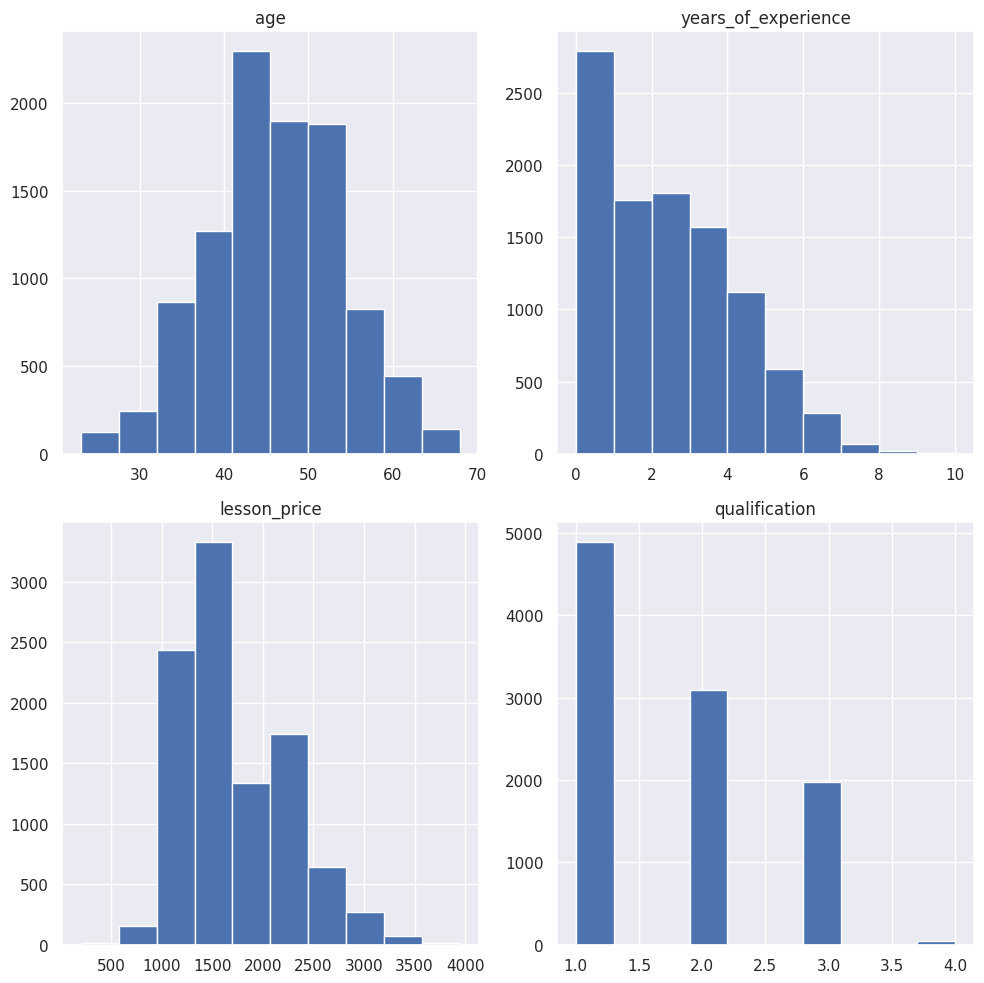

R^2 score: 0.6501289045462111
Mean Squared Error: 62.9594532842704


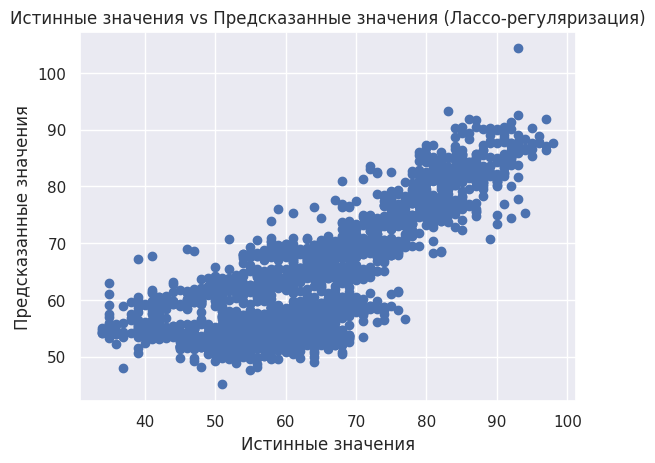

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Загрузка данных
df = pd.read_csv('exam_регр.csv', sep=';')

# Проверка столбцов
print(df.columns)

# Проверка типов данных
print(df.dtypes)

# Преобразование всех категориальных переменных в числовые
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Id', 'mean_exam_points'])
y = df['mean_exam_points']

# Построение гистограмм для всех признаков
X.hist(X.columns, figsize=(10, 10))
plt.tight_layout()
plt.show()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Лассо-регуляризации
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lasso_model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 score: {r2}")
print(f"Mean Squared Error: {mse}")

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные значения vs Предсказанные значения (Лассо-регуляризация)')
plt.show()


<Axes: >

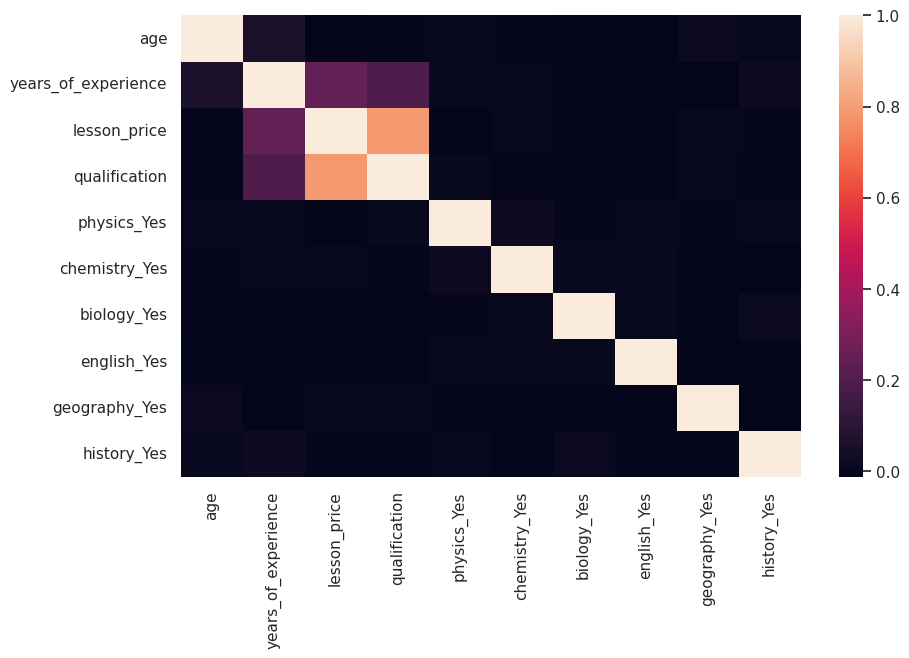

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
print('coef: ',regressor.coef_)

test mse:  65.74422304729727
r2 score:  0.6395869163484321
coef:  [-0.08074084  0.31190719  4.48277826  6.67617687  2.43335153  0.14554611
  0.37220924  0.21875502  0.05152502  0.09605936]


# Классификация

## Наивный гауссовский классификатор

Наивные байесовские классификаторы основаны на байесовских методах классификации, в основе которых лежит теорема Байеса — уравнение, описывающее
связь условных вероятностей статистических величин. В байесовской классификации нас интересует поиск вероятности метки (категории) при определенных заданных признаках, являющихся результатами наблюдений/экспериментов величин.

В  наивном гауссовском классификаторе мы принимаем допущение, что правдоподобие признаковых значений х при условии, что наблюдение принадлежит классу у, подчиняется нормальному распределению.

In [ ]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект наивного гауссовского классификатора
clf = GaussianNB()
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))


[0]


В библиотеке scikit-learn мы тренируем Наивный гауссовский классификатор, используя метод fit, и, в свою очередь, можем делать предсказания
о классе наблюдения

In [ ]:
# Создать новое наблюдение
new_observation = [[ 4, 4, 4, 0.4,4,4,4,4,0.4,0.4,4,4,4]]

Делаем предсказание о классе наблюдений

In [ ]:
# Предсказать класс
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.99


In [ ]:
# Создать объект наивного  гауссового классификатора с априорными вероятностями для каждого класса
сlf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Обучить модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))

[0]


для дискретных и счетных признаков будем использовать полиномиальный наивный байесов классификатор

In [ ]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import MultinomialNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект полиномиального наивного байесова классификатора  с априорными вероятностями каждого класса
clf = MultinomialNB()
# Натренировать модель
model = clf.fit(features, target)

В классе MuitinoniaiNB модели тренируются с использованием метода fit, а наблюдения можно предсказать с помощью метода predict

In [ ]:
# Создать новое наблюдение
new_observation = [[4, 4, 4, 0.4, 4, 4, 4, 4, 0.4, 0.4, 4, 4, 4]]

In [ ]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.87


Если параметр ciass_prior не задан, то априорные вероятности заучиваются на основе данных.
Если мы хотим, чтобы в качестве априорного распределения использовалась равномерное, то можно задать fit_prior=False.
Класс MuitinomiaiNB содержит гиперпараметр аддитивного сглаживания alpha, который должен быть настроен.
Значение по умолчанию равняется 1.0, при этом значение о.о означает отсутствие сглаживания.

Бернуллиев наивный байесов классификатор или наивный байесова классификатор для бинарных признаков


Принимаем допущение, что все наши признаки являются бинарными, т. е. принимают только два значения.
Кроме того, класс BernoulliNB имеет гиперпараметр аддитивного сглаживания alpha, который требуется настроить с помощью методов отбора модели. Наконец, если необходимо использовать априорные вероятности, то можно применить параметр class prior со списком, содержащим априорные
вероятности для каждого класса. Если требуется указать равномерную априорную
вероятности, то его можно указать  fit_prior=False

In [ ]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import BernoulliNB
# Создать три бинарных признака
features = np.random.randint(2, size=(100, 3))
# Создать вектор бинарных целей
target = np.random.randint(2, size=(100, 1)).ravel()
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса
clf = BernoulliNB(class_prior=[0.25, 0.5])
# Натренировать модель
model = clf.fit(features, target)

In [ ]:
# Создать новое наблюдение
new_observation = [[0, 0, 1]]

In [ ]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.52


## Классификатор k ближайших соседей

В простейшем варианте алгоритм k ближайших соседей рассматривает лишь одного ближайшего соседа – точку обучающего набора, ближе всего расположенную к точке, для которой мы хотим получить прогноз.
Прогнозом является ответ, уже известный для данной точки обучающего набора.

In [ ]:
#Загружаем данные
from sklearn.datasets import load_iris
iris_dataset = load_iris()

В библиотеке scikit-learn есть функция train_test_split, которая перемешивает набор данных и разбивает его на две части. Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором.

Для наших данных зададим обучающие данные, обучающие метки, тестовые данные, тестовые метки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris_dataset['data'], iris_dataset['target'], random_state=0)

Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors. Прежде чем использовать эту модель, нам нужно создать объект-экземпляр класса.
Это произойдет, когда мы зададим параметры модели. Самым важным параметром KNeighborsClassifier является количество соседей, которые мы установим равным 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

Для построения модели на обучающем наборе, мы вызываем метод fit объекта knn, который принимает в качестве аргументов массив
NumPy X_train, содержащий обучающие данные, и массив NumPy y_train, соответствующий обучающим меткам:

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Представим, что мы нашли в дикой природе ирис с длиной чашелистика 5 см, шириной чашелистика 2.9 см, длиной лепестка 1 см и шириной лепестка 0.2 см. К какому сорту ириса нужно отнести этот цветок
Мы можем поместить эти данные в массив NumPy, снова вычисляя форму массива, т.е. количество примеров (1), умноженное на количество признаков (4):

In [ ]:
#Занесем параметры найденного цветка в массив
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format( iris_dataset['target_names'][prediction]))

форма массива X_new: (1, 4)
Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


# Логистическая регрессия

In [ ]:
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv ('example.csv')
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
data.shape

(10000, 4)

In [ ]:
X = data[['student', 'balance', 'income']]
y = data['default']

X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

In [ ]:
#Создаём модель логистической регрессии
log_regression = LogisticRegression()

# Обучаем модель
log_regression. fit (X_train,y_train)

# Используем модель для предсказаний
y_pred = log_regression. predict (X_test)


In [ ]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[2870,   17],
       [  93,   20]], dtype=int64)

In [ ]:
print("Точность:",metrics. accuracy_score (y_test, y_pred))

Точность: 0.9633333333333334


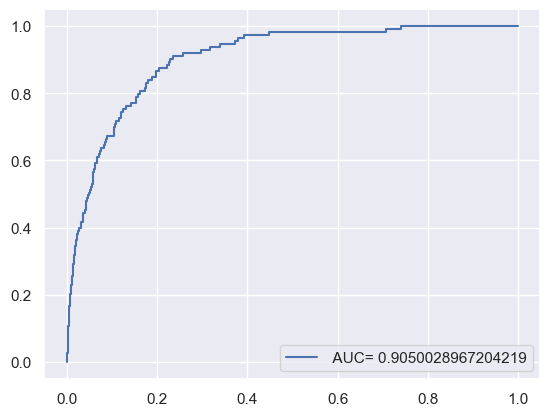

In [ ]:
# Определяем метрики
y_pred_proba = log_regression. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

# Строим ROC-кривую
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()


## Мое

## Линейная регрессия

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')


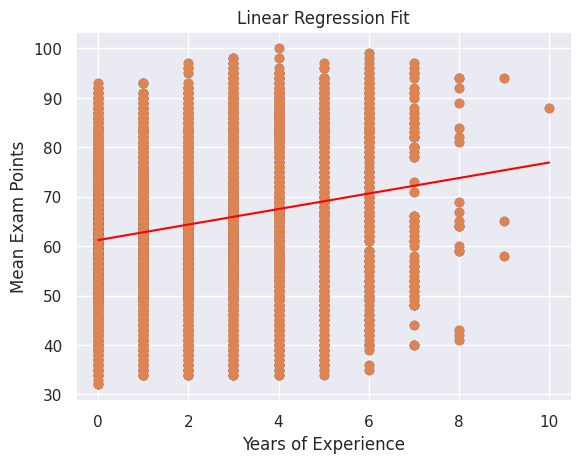

Угловой коэффициент:  1.56905430555378
Точка пересечения с осью координат: 61.22340290572575


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Включаем стиль seaborn
sns.set()

# Загружаем данные из CSV файла с разделителем ;
data = pd.read_csv('exam_регр.csv', sep=';')

# Выводим имена столбцов
print(data.columns)

# Удаление пробелов из имен столбцов (если есть)
data.columns = data.columns.str.strip()

# Извлекаем переменные
x = data['years_of_experience'].values
y = data['mean_exam_points'].values

# Создаем график рассеяния
plt.scatter(x, y)
plt.xlabel('Years of Experience')
plt.ylabel('Mean Exam Points')
plt.title('Scatter Plot of Mean Exam Points vs Years of Experience')

# Создаем и обучаем модель линейной регрессии
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

# Предсказываем значения на основе модели
xfit = np.linspace(x.min(), x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Строим график с линейной регрессией
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Exam Points')
plt.title('Linear Regression Fit')
plt.show()

# Выводим угловой коэффициент и точку пересечения
print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения с осью координат:", model.intercept_)


## Полиномиальные базисные функции

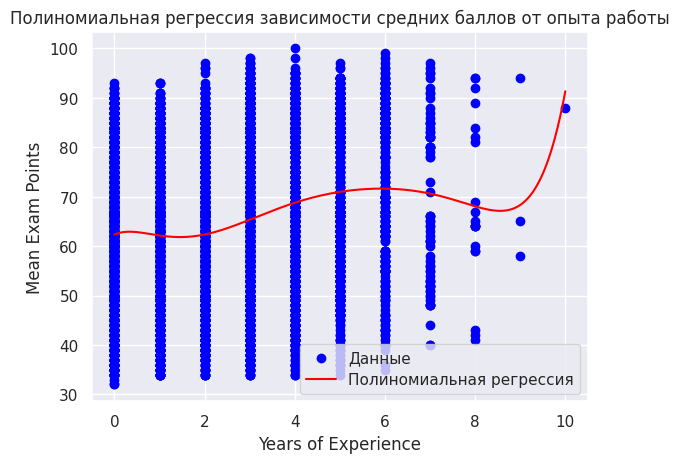

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Загрузка данных из CSV файла с разделителем ;
data = pd.read_csv('exam_регр.csv', sep=';')

# Извлечение переменных
x = data['years_of_experience'].values
y = data['mean_exam_points'].values

# Создание модели полиномиальной регрессии
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

# Обучение модели
poly_model.fit(x[:, np.newaxis], y)

# Создание точек для предсказания
xfit = np.linspace(x.min(), x.max(), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Построение графика
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(xfit, yfit, label='Полиномиальная регрессия', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Exam Points')
plt.title('Полиномиальная регрессия зависимости средних баллов от опыта работы')
plt.legend()
plt.show()


### Гребневая регрессия (L2 -регуляризация)

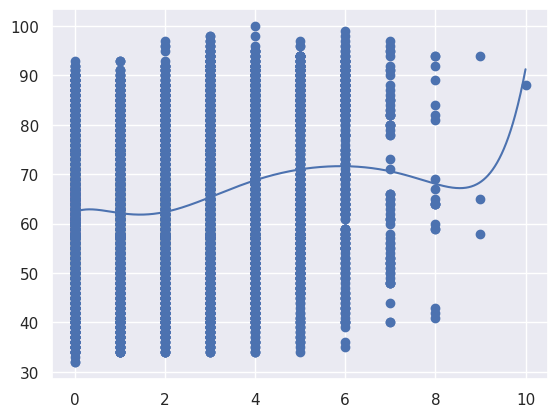

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1)) # Гребневая регрессия
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))


### Лассо-регуляризация (L1 )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.691e+05, tolerance: 1.832e+02
  model = cd_fast.enet_coordinate_descent(


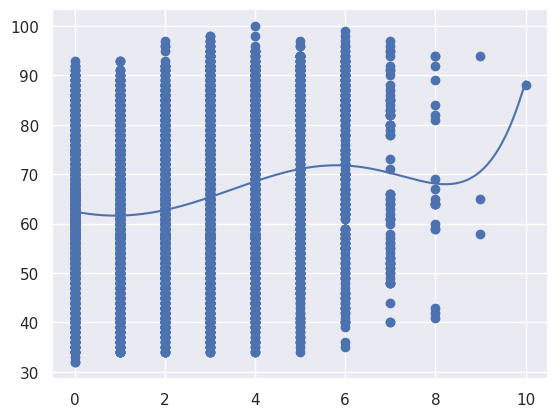

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001)) # Лассо-регуляризация
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

## Пример решения задачи регрессии для датасета

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')
Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                 object
chemistry               object
biology                 object
english                 object
geography               object
history                 object
mean_exam_points       float64
dtype: object


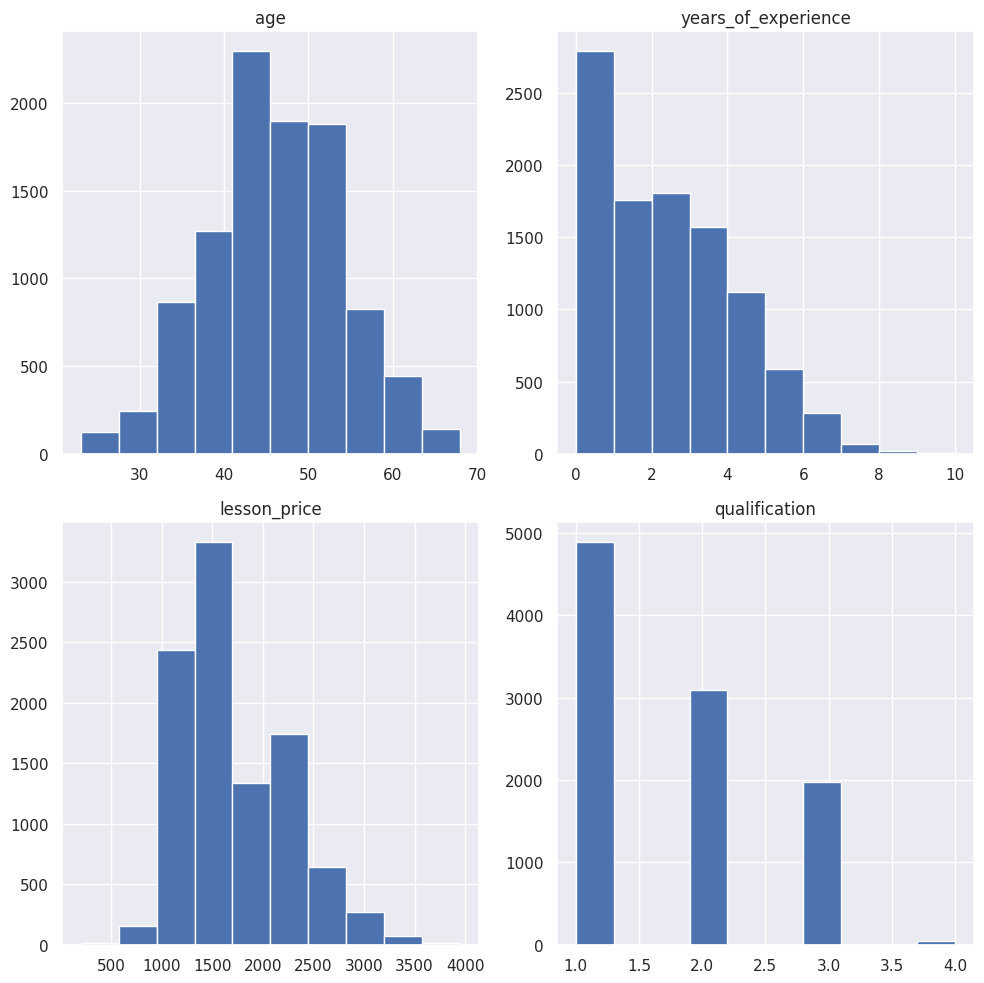

R^2 score: 0.6501289045462111
Mean Squared Error: 62.9594532842704


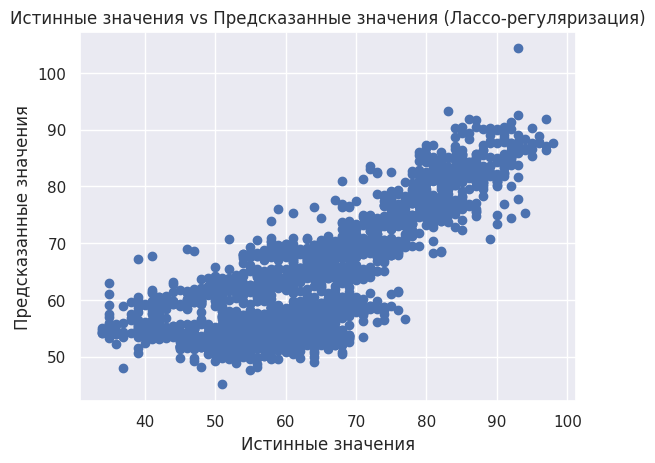

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Загрузка данных
df = pd.read_csv('exam_регр.csv', sep=';')

# Проверка столбцов
print(df.columns)

# Проверка типов данных
print(df.dtypes)

# Преобразование всех категориальных переменных в числовые
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Id', 'mean_exam_points'])
y = df['mean_exam_points']

# Построение гистограмм для всех признаков
X.hist(X.columns, figsize=(10, 10))
plt.tight_layout()
plt.show()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Лассо-регуляризации
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lasso_model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 score: {r2}")
print(f"Mean Squared Error: {mse}")

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные значения vs Предсказанные значения (Лассо-регуляризация)')
plt.show()


<Axes: >

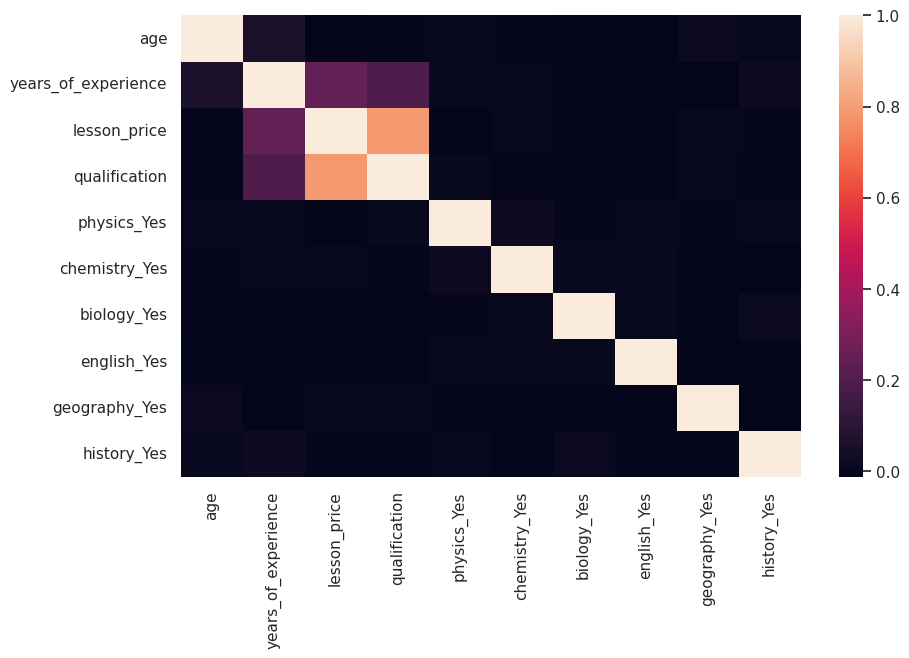

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
print('coef: ',regressor.coef_)

test mse:  65.74422304729727
r2 score:  0.6395869163484321
coef:  [-0.08074084  0.31190719  4.48277826  6.67617687  2.43335153  0.14554611
  0.37220924  0.21875502  0.05152502  0.09605936]


# Классификация

## Наивный гауссовский классификатор

In [ ]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект наивного гауссовского классификатора
clf = GaussianNB()
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))


[0]


In [ ]:
# Создать новое наблюдение
new_observation = [[ 4, 4, 4, 0.4,4,4,4,4,0.4,0.4,4,4,4]]

In [ ]:
# Предсказать класс
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.99


In [ ]:
# Создать объект наивного  гауссового классификатора с априорными вероятностями для каждого класса
сlf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Обучить модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))

[0]


In [ ]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import MultinomialNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект полиномиального наивного байесова классификатора  с априорными вероятностями каждого класса
clf = MultinomialNB()
# Натренировать модель
model = clf.fit(features, target)

In [ ]:
# Создать новое наблюдение
new_observation = [[4, 4, 4, 0.4, 4, 4, 4, 4, 0.4, 0.4, 4, 4, 4]]

In [ ]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.87


In [ ]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import BernoulliNB
# Создать три бинарных признака
features = np.random.randint(2, size=(100, 3))
# Создать вектор бинарных целей
target = np.random.randint(2, size=(100, 1)).ravel()
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса
clf = BernoulliNB(class_prior=[0.25, 0.5])
# Натренировать модель
model = clf.fit(features, target)

In [ ]:
# Создать новое наблюдение
new_observation = [[0, 0, 1]]

In [ ]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.62


In [ ]:
import numpy as np

# Function to select elements from X for a balanced representation
def balanced_selection(X, y, test_size=0.3, random_state=42):
    # Ensure reproducibility
    np.random.seed(random_state)

    # Determine the number of elements to select from each class
    n = int(len(X) * test_size)
    n_per_class = n // 2  # Assuming two classes

    # Separate indices for each class
    class_indices = [np.where(y == c)[0] for c in np.unique(y)]

    # Randomly select n_per_class elements from each class
    selected_indices = np.concatenate([np.random.choice(indices, n_per_class, replace=False) for indices in class_indices])

    # Select the corresponding elements from X
    X_selected = X[selected_indices]

    return X_selected

# Example usage
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

X_selected = balanced_selection(X, y, test_size=0.3, random_state=42)
print(X_selected)


[]


## Классификатор k ближайших соседей

# Логистическая регрессия

# Задание

## Регрессия

a. Постройте линейную регрессию для заданного набора данных. Варианты заданий:
   1. exam_регр.csv
   1. cars.csv
   1. bikes_rent.csv
   1. garments_worker_productivity.csv
   1. Salary.csv
   1. Salary Data.csv
   1. winequality-red.csv
   1. уровень шума.csv
   1. Concrete_Data.xls
   1. зар. плата.xls
   1. продажа автомобилей (из объявлений).xls
   1. ПРОДАЖИ.xls
   1. AirQualityUCI.xlsx
   1. Nedvig.xlsx
   1. Real estate valuation data set.xlsx
   
b. Проверьте и оцените точность построенной модели

c. Постройте графики модели в координатах целевой переменной и любых двух факторов

Линейная регрессия для garments_worker_productivity.csv

Импорт библиотек

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate
import numpy as np  # Добавлен импорт numpy


Загрузка данных

In [ ]:
# Загрузка данных с правильным разделителем
data = pd.read_csv('garments_worker_productivity.csv')

# Вывод списка всех столбцов в датасете
print("Столбцы в датасете:\n", data.columns)

# Проверка наличия пропущенных значений
print("Пропущенные значения:\n", data.isnull().sum())

# Удаление строк с пропущенными значениями (если они есть)
data = data.dropna()


Столбцы в датасете:
 Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')
Пропущенные значения:
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


Обработка категориальных признаков

In [ ]:
# Идентификация категориальных столбцов
categorical_columns = data.select_dtypes(include=['object']).columns

# Преобразование категориальных признаков в числовые
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


Подготовка данных

In [ ]:
# Определение целевого столбца
target_column = 'actual_productivity'

# Проверка, что целевой столбец существует в датасете
if target_column in data.columns:
    # Разделение данных на признаки и целевую переменную
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print(f"Ошибка: столбец '{target_column}' не найден в датасете.")
    exit()


Построение и обучение модели


In [ ]:
# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Прогнозирование на тестовой выборке

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)


Оценка модели

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Создание таблицы с метриками
metrics = [
    ["Mean Squared Error (MSE)", mse],
    ["Root Mean Squared Error (RMSE)", rmse],
    ["Mean Absolute Error (MAE)", mae],
    ["R^2 Score", r2]
]
print("\nОценка точности построенной модели:")
print(tabulate(metrics, headers=["Метрика", "Значение"], tablefmt="grid"))



Оценка точности построенной модели:
+--------------------------------+------------+
| Метрика                        |   Значение |
+================================+============+
| Mean Squared Error (MSE)       | 0.00438913 |
+--------------------------------+------------+
| Root Mean Squared Error (RMSE) | 0.0662505  |
+--------------------------------+------------+
| Mean Absolute Error (MAE)      | 0.0488105  |
+--------------------------------+------------+
| R^2 Score                      | 0.788948   |
+--------------------------------+------------+


Вывод коэффициентов модели


In [ ]:
# Создание таблицы с коэффициентами модели
coefficients = [[feature, coef] for feature, coef in zip(X.columns, model.coef_)]
coefficients.append(["Intercept", model.intercept_])
print("\nКоэффициенты модели:")
print(tabulate(coefficients, headers=["Признак", "Коэффициент"], tablefmt="grid"))



Коэффициенты модели:
+-----------------------+---------------+
| Признак               |   Коэффициент |
+=======================+===============+
| team                  |  -0.00255431  |
+-----------------------+---------------+
| targeted_productivity |   0.611149    |
+-----------------------+---------------+
| smv                   |  -0.00311375  |
+-----------------------+---------------+
| wip                   |   3.88042e-06 |
+-----------------------+---------------+
| over_time             |  -2.43338e-06 |
+-----------------------+---------------+
| incentive             |   0.00317369  |
+-----------------------+---------------+
| idle_time             |   0.000547675 |
+-----------------------+---------------+
| idle_men              |  -0.00575842  |
+-----------------------+---------------+
| no_of_style_change    |  -0.000807112 |
+-----------------------+---------------+
| no_of_workers         |   0.00132646  |
+-----------------------+---------------+
| date_1/10/

MSE: Среднее квадратическое отклонение между предсказанными и фактическими значениями. Чем меньше, тем лучше.

RMSE: Квадратный корень из MSE. Чем меньше, тем лучше. RMSE интерпретируется в тех же единицах, что и целевая переменная.

MAE: Средняя абсолютная ошибка. Чем меньше, тем лучше. MAE также интерпретируется в тех же единицах, что и целевая переменная.

R^2 Score: Коэффициент детерминации. Значение от 0 до 1, где 1 означает идеальную модель, а 0 — модель, которая не объясняет вариацию данных.

## Классификация

a. Решите задачу классификации для заданных наборов данных методами k-ближайших соседей, наивного байесовского классификатора, логистической регрессии. Варианты заданий:
   1. horse.csv (outcome)
   1. winequality-red.csv (quality)
   1. winequality-white.csv (quality)
   1. выгорание.zip (attrition)
   1. adult.data.csv (salary)
   1. Response_кл.csv
   1. telecom_churn.csv (Churn)
   1. Visualizations_кл.csv
   1. hepatitis.txt
   1. классификация грибов( съедобные-несъедобные).xls
   1. diabetes.xlsx
   1. Nedvig_класс.xlsx

b. Проверьте и оцените точность модели. Обоснуйте выбранные механизмы оценки (метрики, спомоб оценки, результат)

c. Постройте график с объектами и разделяющей поверхностью для любой пары признаков

задача классификации telecom_churn.csv (Churn)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

# Загрузка данных
data = pd.read_csv('telecom_churn.csv')

# Вывод списка всех столбцов в датасете
print("Столбцы в датасете:\n", data.columns)

# Проверка наличия пропущенных значений
print("Пропущенные значения:\n", data.isnull().sum())

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Определение целевого столбца
target_column = 'Churn'

# Проверка, что целевой столбец существует в датасете
if target_column in data.columns:
    # Преобразование целевого столбца в числовой формат (0 и 1)
    data[target_column] = data[target_column].map({True: 1, False: 0})

    # Разделение данных на признаки и целевую переменную
    y = data[target_column]
    X = data.drop(columns=[target_column])

    # Преобразование категориальных признаков в числовые
    categorical_columns = X.select_dtypes(include=['object']).columns

    if len(categorical_columns) > 0:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(X[categorical_columns])
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
        X = X.drop(columns=categorical_columns).join(encoded_df)

    # Балансировка классов
    smote = SMOTE()
    X, y = smote.fit_resample(X, y)

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Масштабирование признаков
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Построение и оценка моделей
    models = {
        'KNN': KNeighborsClassifier(n_neighbors=min(5, len(X_train))),  # Уменьшаем количество соседей
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append([name, accuracy, report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']])

    # Создание таблицы с результатами
    headers = ["Модель", "Accuracy", "Precision", "Recall", "F1-Score"]
    print("\nРезультаты классификации:")
    print(tabulate(results, headers=headers, tablefmt="grid"))
else:
    print(f"Ошибка: столбец '{target_column}' не найден в датасете.")
    print("Существующие столбцы в датасете:\n", data.columns)


Столбцы в датасете:
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Пропущенные значения:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge 

***Обоснуйте выбранные механизмы оценки (метрики, спомоб оценки, результат)***

Обоснование Выбранных Механизмов Оценки
1. Метрики Оценки

Accuracy (Точность):
Доля правильных предсказаний модели среди всех предсказаний.
Это базовая метрика, которая дает общее представление о качестве модели. Она полезна для получения начального понимания, но не всегда адекватна для несбалансированных классов.

Precision (Точность):
Доля истинно положительных предсказаний среди всех положительных предсказаний.
Важна, когда нужно минимизировать ложноположительные предсказания. Например, в медицинской диагностике ложноположительные результаты могут привести к ненужным дополнительным исследованиям.

Recall (Полнота):
Доля истинно положительных предсказаний среди всех фактически положительных случаев.
Важна, когда важно минимизировать ложноотрицательные предсказания. Например, в медицинской диагностике ложноотрицательные результаты могут привести к пропуску заболевания.

F1-Score (F1-мера):
Гармоническое среднее между точностью и полнотой.
Сбалансирует точность и полноту, что полезно для оценки модели в случаях, когда классы несбалансированы.

2. Способ Оценки
Train-Test Split:
Данные разделяются на обучающую и тестовую выборки (80% на 20%).
Этот метод позволяет оценить, насколько хорошо модель обобщает на новые, ранее не виденные данные. Он прост в реализации и дает быстрые результаты.
Cross-Validation (Кросс-валидация):

Данные разделяются на несколько фолдов, и модель обучается и оценивается на каждом фолде.
Кросс-валидация дает более надежную оценку качества модели, так как она учитывает вариации в данных. Однако, в данном случае мы использовали train-test split для упрощения и быстроты оценки.
SMOTE (Synthetic Minority Over-sampling Technique):

Метод для балансировки классов путем создания синтетических экземпляров меньшего класса.
Использование SMOTE помогает улучшить качество моделей, особенно в случаях, когда классы несбалансированы. Это позволяет модели лучше распознавать меньший класс.

3. Результаты
KNN (K-Nearest Neighbors):
показал средние результаты. Низкая точность и F1-мера указывают на то, что модель может быть улучшена, возможно, путем настройки гиперпараметров или использования других методов предобработки данных.

Naive Bayes:
показал хорошие результаты, особенно по точности и полноте. Это указывает на то, что модель хорошо распознает как положительные, так и отрицательные классы.

Logistic Regression:
показала наилучшие результаты среди всех моделей. Высокая точность, полнота и F1-мера свидетельствуют о высоком качестве модели.

Заключение
Выбранные метрики (accuracy, precision, recall, F1-score) и способ оценки (train-test split с балансировкой классов) позволяют комплексно оценить качество моделей. Результаты показывают, что Logistic Regression является наиболее эффективной моделью для данной задачи, демонстрируя высокие значения всех метрик.

## Теоретические разделы и контрольные вопросы для подготовки к защите

1. Виды машинного обучения
1. Основные задачи машинного обучения и их особенности
1. Модель линейной регрессии с одной переменной
1. Функционал ошибки
1. Градиент и метод градиентного спуска
1. Градиентный спуск в задаче линейной регрессии
1. Множественная регрессия
1. Предобработка данных для множественной регрессии
1. Градиентный спуск в задаче множественной регрессии
1. Аналитическое решение задачи множественной регрессии, его особенности
1. Регуляризация
1. Ridge и Lasso регрессия. Область применения, настройки методов, отличия от обычной линейной регрессии
1. Линейный классификатор
1. Модель логистической регрессии
1. Функционал ошибки логистической регрессии
1. Градиентный спуск в задаче логистической регрессии
1. Многоклассовая классификация
1. Теорема Байеса
1. Наивный байесовский классификатор. Идея. Алгоритм.
1. Получение оценок априорных и безусловных вероятностей
1. Метрики качества классификаторов
1. Несбалансированные классы и методы оценки качества (математические выражения, смысл, интерпретация метрик)

### 1) Виды Машинного Обучения
- **Надзорное обучение**: Использует метки для обучения модели.
- **Безнадзорное обучение**: Обучается на неотмеченных данных.
- **Полу-надзорное обучение**: Использует комбинацию отмеченных и неотмеченных данных.
- **Обучение с подкреплением**: Модель учится на основе вознаграждений и штрафов.

### 2) Основные Задачи Машинного Обучения и Их Особенности
- **Классификация**: Предсказание категорий (например, спам/не спам). Использует метрики: точность, полнота, F1-мера.
- **Регрессия**: Предсказание непрерывных значений (например, цена дома). Использует метрики: MSE, MAE.
- **Кластеризация**: Группировка данных (например, сегментация клиентов). Использует метрики: силуэтный коэффициент.
- **Снижение размерности**: Уменьшение числа признаков (например, PCA). Использует метрики: объясненная дисперсия.

### 3) Модель Линейной Регрессии с Одной Переменной
- **Задача**: Найти параметры, минимизирующие ошибку.

### 4) Функционал Ошибки
Среднеквадратичная ошибка (MSE): Измеряет среднее квадратичное отклонение предсказанных значений от истинных.
Средняя абсолютная ошибка (MAE): Измеряет среднее абсолютное отклонение предсказанных значений от истинных.

### 5) Градиент и Метод Градиентного Спуска
- **Градиент**: Вектор частных производных функции.
- **Градиентный спуск**: Метод оптимизации, который обновляет параметры в направлении, противоположном градиенту функции ошибки.

### 6) Градиентный Спуск в Задаче Линейной Регрессии
Обновление параметров: Параметры обновляются в направлении, противоположном градиенту функции ошибки.
Процесс: Повторяется до сходимости.

### 7) Множественная Регрессия
Задача: Найти параметры, минимизирующие ошибку.

### 8) Предобработка Данных для Множественной Регрессии
- **Нормализация**: Приведение признаков к одному диапазону.
- **Стандартизация**: Приведение признаков к нулевому среднему и единичному стандартному отклонению.
- **Обработка пропущенных значений**: Импутация или удаление.

### 9) Градиентный Спуск в Задаче Множественной Регрессии
Обновление параметров: Параметры обновляются в направлении, противоположном градиенту функции ошибки.

### 10) Аналитическое Решение Задачи Множественной Регрессии
- **Формула**: \( \theta = (X^T X)^{-1} X^T y \)
- **Особенности**: Требует вычисления обратной матрицы, что может быть некомпактно для больших данных.

### 11) Регуляризация
- **Цель**: Предотвратить переобучение.
- **Методы**: Ridge и Lasso.

### 12) Ridge и Lasso Регрессия
Ridge (L2): Добавляет штраф за большие значения параметров.
Lasso (L1): Добавляет штраф за абсолютные значения параметров.
Область применения: Ridge для сглаживания параметров, Lasso для отбора признаков.
Отличия: Lasso может занулять параметры, Ridge сглаживает их.
- **Область применения**: Ridge для сглаживания параметров, Lasso для отбора признаков.
- **Отличия**: Lasso может занулять параметры, Ridge сглаживает их.

### 13) Линейный Классификатор
- **Цель**: Разделение данных гиперплоскостью.
- **Пример**: Логистическая регрессия.

### 14) Модель Логистической Регрессии
Задача: Найти параметры, максимизирующие правдоподобие.

### 15) Функционал Ошибки Логистической Регрессии
Логарифмическая функция потерь: Измеряет разницу между предсказанными и истинными значениями.

### 16) Градиентный Спуск в Задаче Логистической Регрессии
Обновление параметров: Параметры обновляются в направлении, противоположном градиенту функции ошибки.

### 17) Многоклассовая Классификация
- **Методы**: One-vs-All (OvA) и One-vs-One (OvO).
- **OvA**: Обучение одного классификатора на каждый класс.
- **OvO**: Обучение классификатора для каждой пары классов.

### 18) Теорема Байеса
Смысл: Определяет вероятность гипотезы при условии наблюдения.

### 19) Наивный Байесовский Классификатор
Идея: Предполагает независимость признаков.
Алгоритм: Оценивает вероятность класса на основе вероятностей признаков.

### 20) Получение Оценок Априорных и Безусловных Вероятностей
Априорная вероятность: Определяется как отношение количества объектов класса к общему количеству объектов.
Безусловная вероятность: Оценивается по данным.

### 21) Метрики Качества Классификаторов
Точность: Отношение правильно классифицированных объектов к общему числу объектов.
Точность: Отношение правильно классифицированных положительных объектов к общему числу предсказанных положительных объектов.
Полнота: Отношение правильно классифицированных положительных объектов к общему числу истинно положительных объектов.
F1-мера: Среднее гармоническое точности и полноты.

### 22) Несбалансированные Классы и Методы Оценки Качества
- **Метрики**: Precision, Recall, F1-мера, AUC-ROC.
- **Методы**: SMOTE, класс-взвешивание, изменение порога классификации.
- **Интерпретация**: Precision и Recall помогают оценить баланс между ложноположительными и ложноотрицательными предсказаниями. AUC-ROC показывает общую способность модели к классификации.